In [295]:
import cv2

In [296]:
import matplotlib.pyplot as plt

In [297]:
from deepface import DeepFace

In [298]:
cam = cv2.VideoCapture(0)

In [299]:
frameWidth = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))

In [300]:
frameHeight = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [301]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [302]:
x1 = int(frameWidth/2 - 350)
x2 = int(frameWidth/2 + 350)

In [303]:
def detectEmotion(img):
    cv2.waitKey(1)
    try:
        emotion = DeepFace.analyze(img)
        #display rectangle
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            #how to include this downloaded file on other computers?
        grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(grey, 1.1, 4)
        
        
        for(x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (173, 31, 41), 4)
        
        #display emotion
            yText = setYCoordinate(y, h)
            cv2.putText(img,
                            emotion[0]['dominant_emotion'],
                            (x, yText),
                            font, 3,
                            (173, 31, 41),
                            6,
                            cv2.LINE_4);
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cropped_img = img_rgb[0:1000, x1:x2]
        cv2.imshow("emotion results", cropped_img)
        cv2.moveWindow("emotion results",x1+300,0)
    except Exception as e:
        cv2.putText(img,
                            "Face not found: retake image",
                            (400, 175),
                            font, 1,
                            (173, 31, 41),
                            3,
                            cv2.LINE_4);
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cropped_img = img_rgb[0:1000, x1:x2]
        cv2.imshow("error", cropped_img)
        cv2.moveWindow("error",x1+300,0)

In [304]:
def setCamera():
    cv2.waitKey(1)
    while True:
        ret, frame = cam.read()
        cropped_frame = frame[0:1000, x1:x2]
        window_name = "Camera"
        cv2.imshow(window_name, cropped_frame)
    
    #convert image to color
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
        #plt.imshow(frame_rgb)
        plt.axis("off")
    
        #clear_output(wait=True)
        #display(plt.gcf())
    
    #press spacebar to capture image 
        if cv2.waitKey(1) & 0xFF == 32:
            img_filename = "captured_emotion.png"
            cv2.imwrite(img_filename, frame)
            print(f"Image saved as {img_filename}")
            captured_img = cv2.imread(img_filename)
            img = cv2.cvtColor(captured_img, cv2.COLOR_BGR2RGB)
            nullException = detectEmotion(img)
            cv2.waitKey(1)  
            break
        elif cv2.waitKey(1) & 0xFF == 113:
            window_name = None
            cv2.destroyAllWindows()
            cam.release()
            cv2.waitKey(1)
            break
    
    
    #key = cv2.waitKey(1)t
    #cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) > 0
    while window_name != None:
        if cv2.waitKey(1) & 0xFF == 113:
            window_name = None
            cv2.destroyAllWindows()
            cam.release()
            cv2.waitKey(1)
            break
        elif cv2.waitKey(1) & 0xFF == 114:
            window_name = None
            cv2.destroyAllWindows()
            setCamera()
            cv2.waitKey(1)
    
    
    

In [305]:
def setYCoordinate(y, h):
    if (y <= 70):
        return y + h + 70
    else:
        return y - 50

Image saved as captured_emotion.png


Action: race: 100%|███████████████████████████████| 4/4 [00:00<00:00,  5.64it/s]


Image saved as captured_emotion.png


Action: race: 100%|███████████████████████████████| 4/4 [00:00<00:00,  8.43it/s]


Image saved as captured_emotion.png


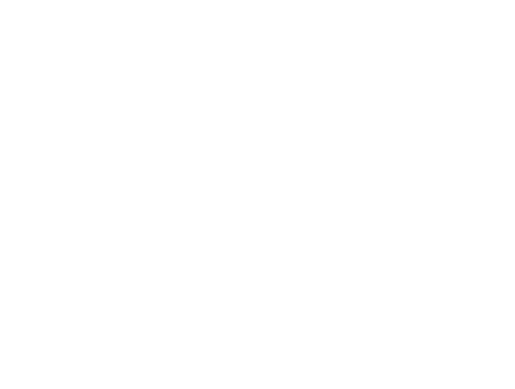

In [306]:
setCamera()